/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


     id                                              nome  host_id  \
0  2595                             Skylit Midtown Castle     2845   
1  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
2  3831                   Cozy Entire Floor of Brownstone     4869   
3  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
4  5099         Large Cozy 1 BR Apartment In Midtown East     7322   

     host_name bairro_group        bairro  latitude  longitude  \
0     Jennifer    Manhattan       Midtown  40.75362  -73.98377   
1    Elisabeth    Manhattan        Harlem  40.80902  -73.94190   
2  LisaRoxanne     Brooklyn  Clinton Hill  40.68514  -73.95976   
3        Laura    Manhattan   East Harlem  40.79851  -73.94399   
4        Chris    Manhattan   Murray Hill  40.74767  -73.97500   

         room_type  price  minimo_noites  numero_de_reviews ultima_review  \
0  Entire home/apt    225              1                 45    2019-05-21   
1     Private room    150   

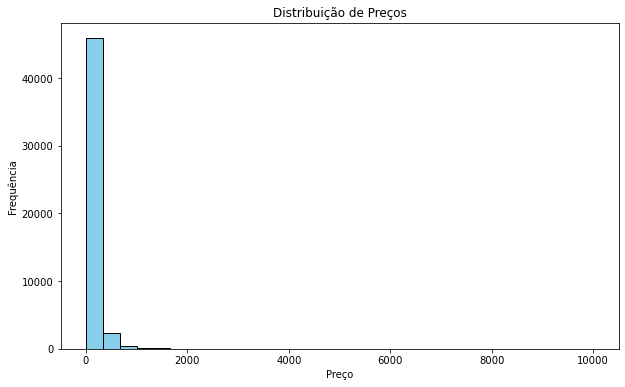

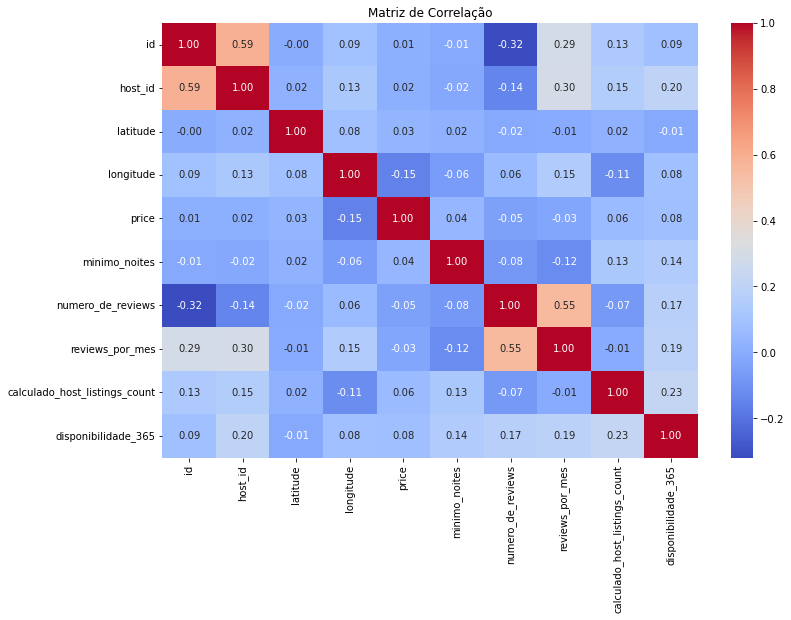

Bairros com Maior Potencial de Retorno de Investimento:
bairro_group
Manhattan        196.875814
Brooklyn         124.381983
Staten Island    114.812332
Queens            99.517649
Bronx             87.496792
Name: price, dtype: float64


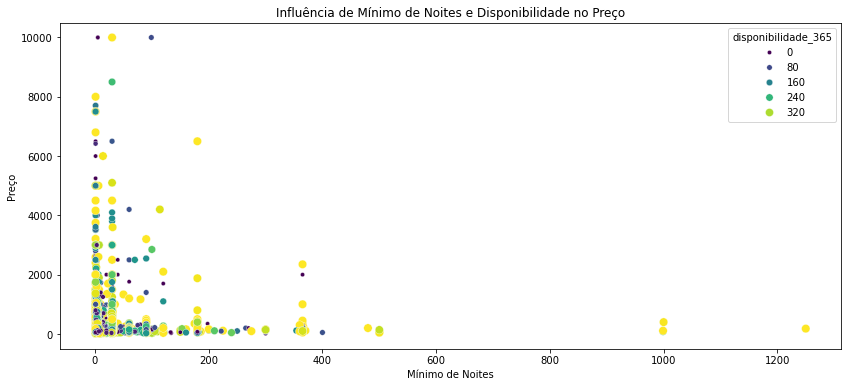

Top 10 Locais de Maior Valor:
      bairro_group             bairro        room_type  minimo_noites  \
9150        Queens            Astoria     Private room            100   
17691     Brooklyn         Greenpoint  Entire home/apt              5   
29237    Manhattan    Upper West Side  Entire home/apt             30   
6529     Manhattan        East Harlem  Entire home/apt              5   
12341    Manhattan    Lower East Side     Private room             99   
40432    Manhattan    Lower East Side  Entire home/apt             30   
30267    Manhattan            Tribeca  Entire home/apt             30   
4376      Brooklyn       Clinton Hill  Entire home/apt              1   
29661    Manhattan    Upper East Side  Entire home/apt              1   
42522    Manhattan  Battery Park City  Entire home/apt              1   

       disponibilidade_365  
9150                     0  
17691                    0  
29237                   83  
6529                     0  
12341                

['modelo_precificacao.pkl']

In [1]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import joblib

# Carregando o conjunto de dados
df = pd.read_csv('teste_indicium_precificacao.csv')


# --- Análise Exploratória de Dados (EDA) ---

# Visualizando as primeiras linhas do conjunto de dados
print(df.head())

# Resumo estatístico
print(df.describe())


# Distribuição de preços
plt.figure(figsize=(10, 6))
plt.hist(df['price'].dropna(), bins=30, edgecolor='black', color='skyblue')
plt.title('Distribuição de Preços')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.show()



# Correlações entre variáveis
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()


# Identificando bairros com maior potencial de retorno de investimento
avg_price_by_neighbourhood = df.groupby('bairro_group')['price'].mean().sort_values(ascending=False)
print("Bairros com Maior Potencial de Retorno de Investimento:")
print(avg_price_by_neighbourhood.head())

# Analisando a influência de número mínimo de noites e disponibilidade no preço
plt.figure(figsize=(14, 6))
sns.scatterplot(data=df, x='minimo_noites', y='price', hue='disponibilidade_365', palette='viridis', size='disponibilidade_365')
plt.title('Influência de Mínimo de Noites e Disponibilidade no Preço')
plt.xlabel('Mínimo de Noites')
plt.ylabel('Preço')
plt.show()

# Explorando padrões nas variáveis relevantes
colunas_relevantes = ['bairro_group', 'bairro', 'room_type', 'minimo_noites', 'disponibilidade_365']

if all(coluna in df.columns for coluna in colunas_relevantes):
    top_location_patterns = df.nlargest(10, 'price')[colunas_relevantes]
    print("Top 10 Locais de Maior Valor:")
    print(top_location_patterns)
else:
    print(f"As colunas {', '.join(colunas_relevantes)} não estão presentes no conjunto de dados.")

# --- Modelagem e Avaliação ---

# Tratando valores ausentes
imputer = SimpleImputer(strategy='mean')
features = ['minimo_noites', 'disponibilidade_365', 'numero_de_reviews', 'reviews_por_mes']
X = df[features]
y = df['price']
X = imputer.fit_transform(X)

# Divisão do conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Criando e treinando o modelo de regressão linear
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Avaliando o modelo no conjunto de teste
predictions = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# --- Sugestão de Preço para o Apartamento Específico ---

# Supondo um apartamento com as características fornecidas
apartamento_especifico = {
    'minimo_noites': 1,
    'disponibilidade_365': 355,
    'numero_de_reviews': 45,
    'reviews_por_mes': 0.38
}

# Convertendo para DataFrame e tratando valores ausentes
apartamento_especifico_df = pd.DataFrame([apartamento_especifico])
apartamento_especifico_df = imputer.transform(apartamento_especifico_df)

# Predizendo o preço
preco_sugerido = model.predict(apartamento_especifico_df)
print(f'Sugestão de Preço para o Apartamento Específico: {preco_sugerido[0]}')



# Salvar o modelo
joblib.dump(model, 'modelo_precificacao.pkl')
